In [174]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [175]:
log_dir='./logs/'

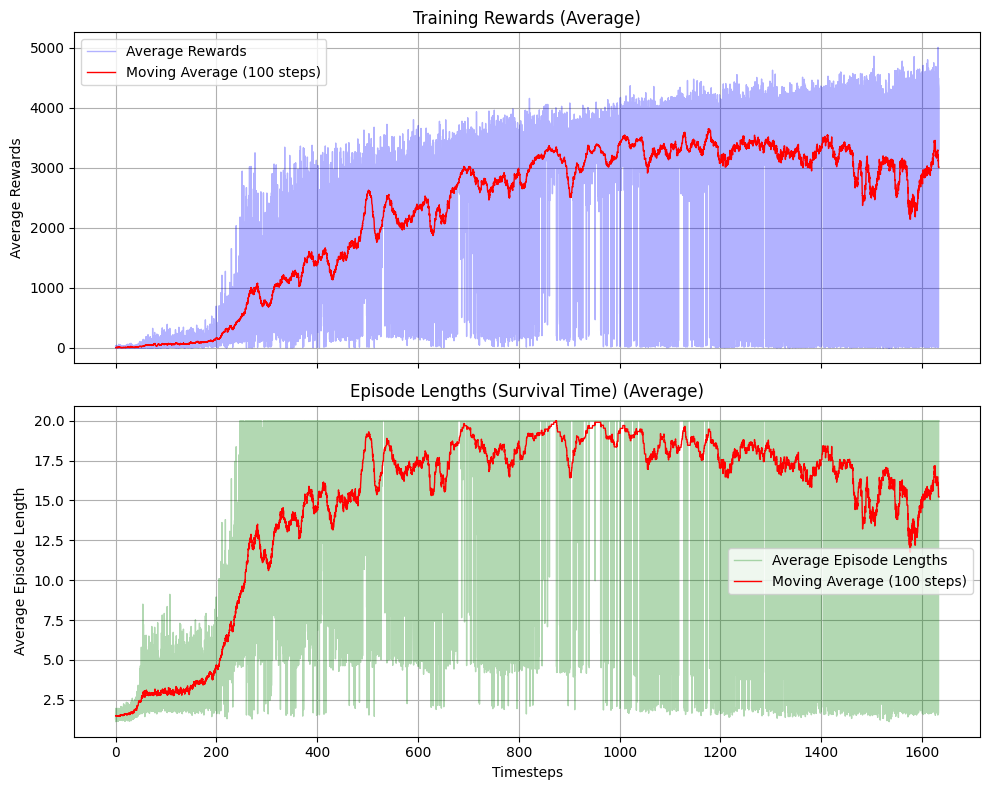

In [176]:
# Get all the monitor.csv files in the log directory
monitor_files = [file for file in os.listdir(log_dir) if file.endswith('.monitor.csv')]

# Load the data from all monitor files
data_frames = []
for file in monitor_files:
    file_path = os.path.join(log_dir, file)
    data = pd.read_csv(file_path, skiprows=1)
    data_frames.append(data)

# Concatenate the data from all monitor files
all_data = pd.concat(data_frames)

# Group the data by timestep and calculate the average rewards and episode lengths
grouped_data = all_data.groupby('t')
avg_rewards = grouped_data['r'].mean()
avg_episode_lengths = grouped_data['l'].mean() / 60
timesteps = avg_rewards.index

# Calculate moving averages
window_size = 100  # Adjust the window size as needed
reward_moving_avg = avg_rewards.rolling(window=window_size).mean()
episode_length_moving_avg = avg_episode_lengths.rolling(window=window_size).mean()

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot average rewards
ax1.plot(timesteps, avg_rewards, color='blue', linewidth=1, alpha=0.3, label='Average Rewards')
ax1.plot(timesteps, reward_moving_avg, color='red', linewidth=1, label=f'Moving Average ({window_size} steps)')
ax1.set_ylabel('Average Rewards')
ax1.set_title('Training Rewards (Average)')
ax1.grid(True)
ax1.legend()

# Plot average episode lengths (survival time)
ax2.plot(timesteps, avg_episode_lengths, color='green', linewidth=1, alpha=0.3, label='Average Episode Lengths')
ax2.plot(timesteps, episode_length_moving_avg, color='red', linewidth=1, label=f'Moving Average ({window_size} steps)')
ax2.set_xlabel('Timesteps')
ax2.set_ylabel('Average Episode Length')
ax2.set_title('Episode Lengths (Survival Time) (Average)')
ax2.grid(True)
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Save the plot as an image file
plt.savefig(f'{log_dir}training_data_avg_with_moving_avg.png')
plt.show()
plt.close()